# HW 1 - PROGRAMMING EXERCISES - Part II. Titanic

## Import Packages

In [75]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset and Inspect Data

In [76]:
# load the Housing Prices dataset
df_test  = pd.read_csv("test.csv");
df_train = pd.read_csv("train.csv");

# check data
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# check data
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# inspect data
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
# basic insepction 
df_train.shape, df_test.shape

((891, 12), (418, 11))

## Preprocess Data
To pre-process data, I will concatenate train and test to facilitate the process. In this way, I can deal with both datasets at the same time.

In [80]:
# concat train and test for data processing
df = pd.concat([df_train, df_test], ignore_index = True);
# drop the target variable Survived in place
target = df_train['Survived']
df.drop(['Survived'], axis = 1, inplace = True)
df.shape

(1309, 11)

### Categorize data
Different methods of pre-processing will be applied for categorical data and numerical data. So I'll classify data into these two types first for future processing.

In [81]:
# get all the categorical columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()
# dataframe with categorical features
data_cat = df[cat_col]
data_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [82]:
# dataframe with numerical features
data_num = df.drop(cat_col, axis = 1)
data_num.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Deal with missing value in Categorical Columns
I'll figure out the number of missing value for each column, check out the columns that have missing values and sort the list in descending order.

In [83]:
# figure out the number of missing value for each column
missing_values = data_cat.isnull().sum()
# check out the columns that have missing values and sort the list in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
print(missing_values)

Cabin       1014
Embarked       2
dtype: int64


Missing values appear in the following two categorical columns: cabin and embarked. After going through the data description, I'll replace missing values in Cabin with NA, implying lack of record. And I'll replace missing values in Embarked with the mode of that column.

* NA: Cabin
* Mode: Embarked

In [84]:
# replace missing values using the above schema
df.Cabin.fillna('NA', inplace = True)
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True) 

In [85]:
# check if there are any missing values
df[cat_col].isnull().values.any()  

False

### Deal with missing value in Numerical Columns
I'll figure out the number of missing value for each column, check out the columns that have missing values and sort the list in descending order.

In [86]:
# figure out the number of missing value for each column
missing_values = data_num.isnull().sum()
# check out the columns that have missing values and sort the list in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
print(missing_values)

Age     263
Fare      1
dtype: int64


Missing values appear in the following two numerical columns: age and fare. After going through the data description, I'll replace missing values in Age and Fare with the mean of that column. 

* Mean: Age, Fare

In [87]:
# replace missing values with mean
df.Age.fillna(df.Age.mean(), inplace=True)
df.Fare.fillna(df.Fare.mean(), inplace=True)


In [88]:
# check if there are any missing values
df.isnull().values.any()  

False

In [89]:
df.isnull().sum().sum()

0

## Deal with categorical values

In [90]:
# list all the categorical features
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [91]:
# STEP 1: Integer encoding
# dealing with categorical variables that have order or relationship
df.Sex = df.Sex.map({'female':0, 'male':1}) 

# STEP 2: use a one-hot encoding (OHE) to map categorical data to integers
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print("The transform data using get_dummies")
df.head(5)

The transform data using get_dummies


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,0,1


## Prepare the Dataset
Split the dataframe to dftrain and dftest.

In [92]:
# get train set and test set
df_train = df.iloc[:len(df_train)]
df_train = df_train.join(target)
df_test = df.iloc[len(df_train):]

df_train.shape, df_test.shape

((891, 13), (418, 12))

## Feature Selection
I'll conduct feature selection by looking into each feature's correlation to our target variable (Survived). Both the heat map and the correlation coefficient demonstrates how each feature correlates with the variable Survived. I'll drop those features that have little correlations. 

In [93]:
# drop PassengerId which obviously doesn't relate to the chance of survival
df_train.drop(['PassengerId'], axis=1, inplace=True)

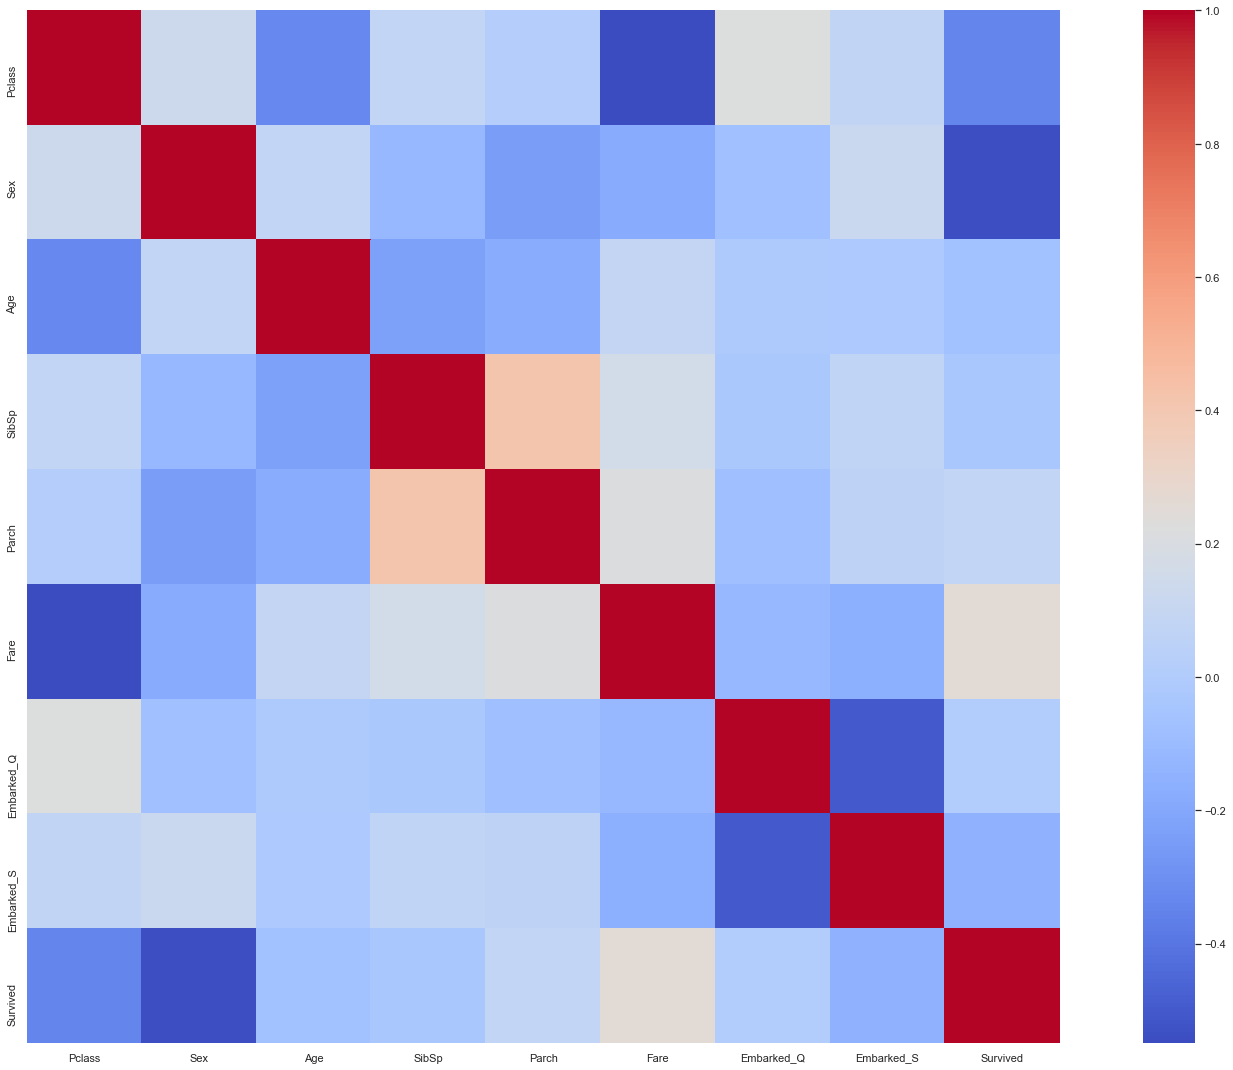

In [94]:
#correlation matrix
corrmat = df_train.corr()

#Plot the heatmap
fig, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1)
sns.heatmap(corrmat, square=True,cmap='coolwarm');
fig.savefig("heatmap") # save pics

In [95]:
# get the correltion coefficients and sort them by values
correlations = corrmat["Survived"].sort_values(ascending=False)
correlations

Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.070323
Embarked_S   -0.149683
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

Drop features that provide too little information and correlate too weak (ie.'Ticket', 'Name', 'Cabin') according to the correlations illustrated above.

In [96]:
y_train  = df_train["Survived"]
X_train  = df_train.drop(['Survived'], axis=1)
X_test = df_test.drop(['PassengerId'], axis=1)
X_train.shape, y_train.shape

((891, 11), (891,))

In [97]:
# drop 'Ticket', 'Name', 'Cabin'
X_train.drop(['Ticket', 'Name', 'Cabin'], axis = 1, inplace=True)
X_test.drop(['Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

## Build Model and Make Predictions
I'll build model using logistc regression and make predictions using the test set. 

In [100]:
# Build model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# Predict using the test set 
submission_predictions = clf.predict(X_test)
# save predictions
res=pd.DataFrame(columns = ['PassengerId', 'Survived'])
res['PassengerId'] = df_test.index + 1
res['Survived'] = submission_predictions
res.to_csv('my_submission.csv',index=False)
submission_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,